# Descriptive Statistics Demonstration

This notebook demonstrates how to calculate and plot the mean, median, mode, and midrange of a data distribution.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, lmfit, and scipy.

In [1]:
# Import the required libraries.
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import GaussianModel
from scipy import signal

## Helper Functions

Define utility functions for plotting distributions and generating normal distributions.

In [2]:
def plot_distribution(ax: plt.Axes, x: np.ndarray, y: np.ndarray,
                      title: str, stats: list):
    """Function to plot the distribution with labels

    Args:
        ax (plt.Axes): The axes to plot the data.
        x (np.ndarray): The X-axis data.
        y (np.ndarray): The Y-axis data.
        title (str): The title of the plot.
        stats (list): The statistics to plot.
    """

    # Plot the data.
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_ylim(0, max(y) * 1.30)

    # Define the labels, linestyles, and Y-offsets.
    labels = [ "Mean", "Median", "Mode", "Midrange" ]
    linestyles = [ "-", "--", "-.", ":" ]
    y_offsets = [ 1.20, 1.14, 1.08, 1.02 ]

    # Plot the statistics.
    for i, (pos, label, ls, y_offset) in enumerate(
        zip(stats, labels, linestyles, y_offsets)
    ):
        ax.axvline(pos, ymin=0.38 + i * 0.04, ymax=0.95 - i * 0.04,
                   linestyle=ls, label=label, alpha=0.5)
        ax.text(pos + 0.2, max(y) * y_offset, label, horizontalalignment="left")

In [3]:
def generate_normal_distribution(data: np.ndarray) -> Tuple:
    """
    Function to generate normal distribution based on data.

    Args:
        data (np.ndarray): The data to generate the distribution.
    
    Returns:
        Tuple: The X-axis, Y-axis, and mean of the distribution.
    """
    mu, sigma = np.mean(data), np.std(data)
    x = np.linspace(min(data), max(data), 1000)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
        -0.5 * ((x - mu) / sigma) ** 2
    )
    return x, y, mu

In [4]:
def fit_two_peaks(data: np.ndarray, bins: np.ndarray) -> Tuple:
    """
    Function to fit Gaussian models to two-peaks data.

    Args:
        data (np.ndarray): The data to fit the Gaussian models.
        bins (np.ndarray): The bins to calculate the histogram.

    Returns:
        Tuple: The X-axis and Y-axis of the fitted Gaussian models.
    """

    # Calculate the histogram.
    hist, _ = np.histogram(data, bins=bins)
    gauss_model_1 = GaussianModel(prefix="g1_")
    gauss_model_2 = GaussianModel(prefix="g2_")

    # Find the peaks and properties.
    peaks, properties = signal.find_peaks(hist, width=True)

    # Fit the Gaussian models.
    if len(peaks) > 1:
        model = gauss_model_1 + gauss_model_2
        p1, p2, p3 = np.unique(
            (properties["left_bases"], properties["right_bases"])
        )
        params1 = gauss_model_1.guess(hist[p1:p2], x=bins[p1:p2])
        params2 = gauss_model_2.guess(hist[p2:p3], x=bins[p2:p3])
        params = params1.update(params2)

    else:
        model = gauss_model_1
        params = model.guess(hist, x=bins[1:])

    # Fit the Gaussian curve.
    result = model.fit(hist, params, x=bins[1:])
    x_values = np.linspace(bins[1:].min() * 1.10, bins[1:].max() * 1.10, 1000)

    return x_values, result.eval(x=x_values)

## Generate Sample Data

Create different types of distributions to demonstrate various statistical measures.

In [5]:
# Define the number of bins and seed.
BINS = 30
np.random.seed(42)

# Generate data and distributions.
symmetric_data = np.random.normal(loc=0, scale=1, size=1000)
x_sym, y_sym, mu_sym = generate_normal_distribution(symmetric_data)

positively_skewed_data = np.random.gamma(shape=2, scale=1, size=1000)
x_pos, y_pos, mu_pos = generate_normal_distribution(positively_skewed_data)

negatively_skewed_data = -np.random.gamma(shape=2, scale=1, size=1000)
x_neg, y_neg, mu_neg = generate_normal_distribution(negatively_skewed_data)

symmetric_two_peaks_data = np.concatenate([
    np.random.normal(loc=-2, scale=1, size=500),
    np.random.normal(loc=2, scale=1, size=500)
])

x_sym_two_peaks, y_sym_two_peaks = fit_two_peaks(
    symmetric_two_peaks_data, bins=np.linspace(
        min(symmetric_two_peaks_data), max(symmetric_two_peaks_data), BINS
    )
)

## Create Visualization

Plot the distributions with statistical measures (mean, median, mode, midrange) using the original plot design.

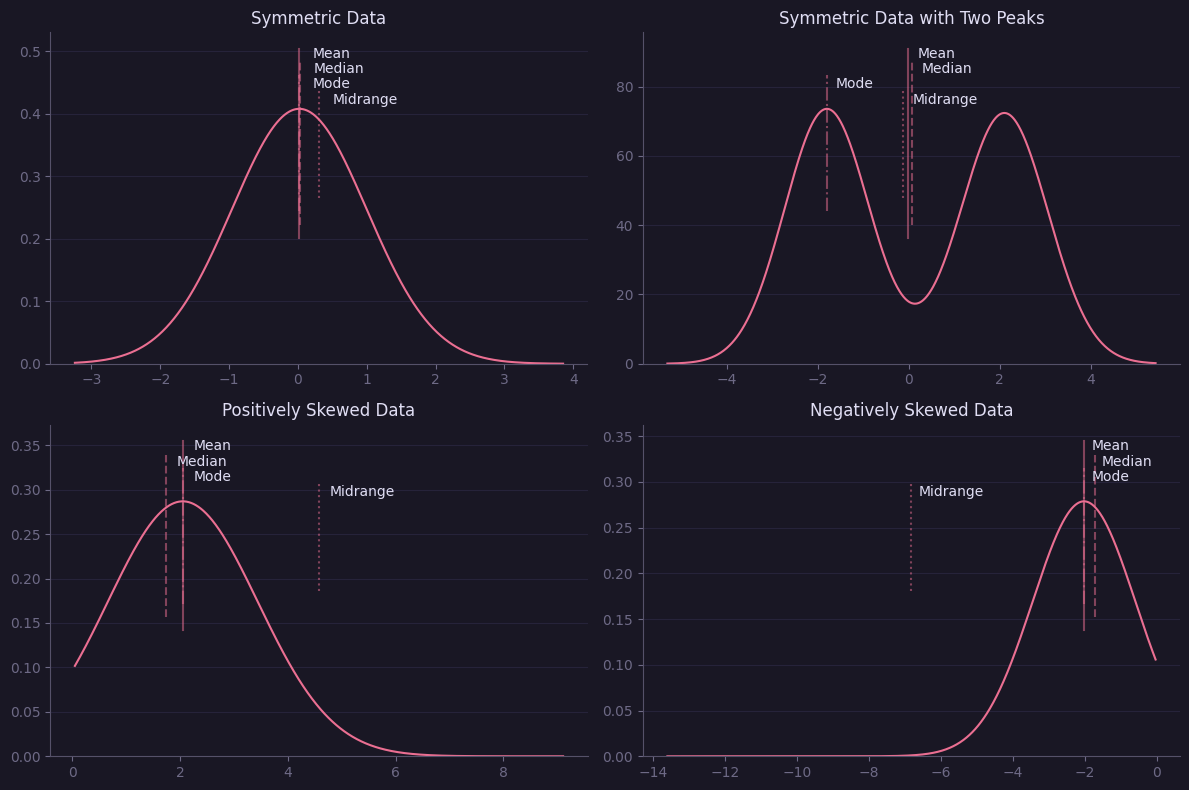

In [6]:
# Plotting the distributions.
with plt.style.context("./data/themes/rose-pine.mplstyle"):

    # Create the figure and axes.
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    plot_distribution(
        axes[0][0], x_sym, y_sym,
        "Symmetric Data",
        [
            np.mean(symmetric_data),
            np.median(symmetric_data),
            x_sym[np.argmax(y_sym)],
            (min(symmetric_data) + max(symmetric_data)) / 2
        ]
    )

    plot_distribution(
        axes[0][1], x_sym_two_peaks, y_sym_two_peaks,
        "Symmetric Data with Two Peaks",
        [
            np.mean(symmetric_two_peaks_data),
            np.median(symmetric_two_peaks_data),
            x_sym_two_peaks[np.argmax(y_sym_two_peaks)],
            (min(symmetric_two_peaks_data) + max(symmetric_two_peaks_data)) / 2
        ]
    )

    plot_distribution(
        axes[1][0], x_pos, y_pos,
        "Positively Skewed Data",
        [
            np.mean(positively_skewed_data),
            np.median(positively_skewed_data),
            x_pos[np.argmax(y_pos)],
            (min(positively_skewed_data) + max(positively_skewed_data)) / 2
        ]
    )

    plot_distribution(
        axes[1][1], x_neg, y_neg,
        "Negatively Skewed Data",
        [
            np.mean(negatively_skewed_data),
            np.median(negatively_skewed_data),
            x_neg[np.argmax(y_neg)],
            (min(negatively_skewed_data) + max(negatively_skewed_data)) / 2
        ])

    plt.tight_layout()
    plt.show()